# Métricas para comparar o WEST com nossos Modelos

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_real = pd.read_csv('../Real_Umbilo.csv', sep=';',decimal=',')
df_real.set_index('Dia', inplace=True)

dqo_real = df_real['DQO_saida']
dqo_real

Dia
0      33.0
1      35.0
2      37.0
3      39.0
4      41.0
       ... 
360    36.0
361    36.0
362    37.0
363    37.0
364    37.0
Name: DQO_saida, Length: 365, dtype: float64

In [3]:
df_simulado = pd.read_csv('../Base_Umbilo_Diaria.csv', sep=';',decimal=',')
df_simulado.set_index('Dia', inplace=True)

dqo_simulada = df_simulado['DQO_saida']
dqo_simulada

Dia
0      83.782370
1      62.736147
2      55.605625
3      52.867768
4      51.670731
         ...    
361    35.116708
362    34.582476
363    34.977963
364    33.868320
365    33.183656
Name: DQO_saida, Length: 366, dtype: float64

In [4]:
df_dqo = pd.concat([dqo_real, dqo_simulada], axis=1)
df_dqo.columns = ['DQO_real', 'DQO_simulada']
df_dqo = df_dqo.dropna()
df_dqo

,DQO_real,DQO_simulada
Dia,,
0,33.0,83.782370
1,35.0,62.736147
2,37.0,55.605625
3,39.0,52.867768
4,41.0,51.670731
...,...,...
360,36.0,35.834283
361,36.0,35.116708
362,37.0,34.582476


In [5]:
seed = 42

# separando treino e teste
DQO_real_training, DQO_real_test, DQO_simulada_training, DQO_simulada_test = train_test_split(df_dqo['DQO_real'], df_dqo['DQO_simulada'], shuffle=False, test_size=0.082) 
print("Test set X", DQO_real_test.shape)
print("Test set y", DQO_simulada_test.shape)

Test set X (30,)
Test set y (30,)


In [6]:
rmse = math.sqrt(mean_squared_error(DQO_real_test, DQO_simulada_test))
mae = mean_absolute_error(DQO_real_test, DQO_simulada_test)
mape = mean_absolute_percentage_error(DQO_real_test, DQO_simulada_test)
r2 = r2_score(DQO_real_test, DQO_simulada_test)

df_metricas = pd.DataFrame(data={'RMSE':[rmse], 'MAE':[mae], 'MAPE':[mape],'R²':[r2]})
df_metricas

,RMSE,MAE,MAPE,R²
0,22.940526,14.534622,0.204951,0.110802


        RMSE        MAE      MAPE        R²
0  22.940526  14.534622  0.204951  0.110802


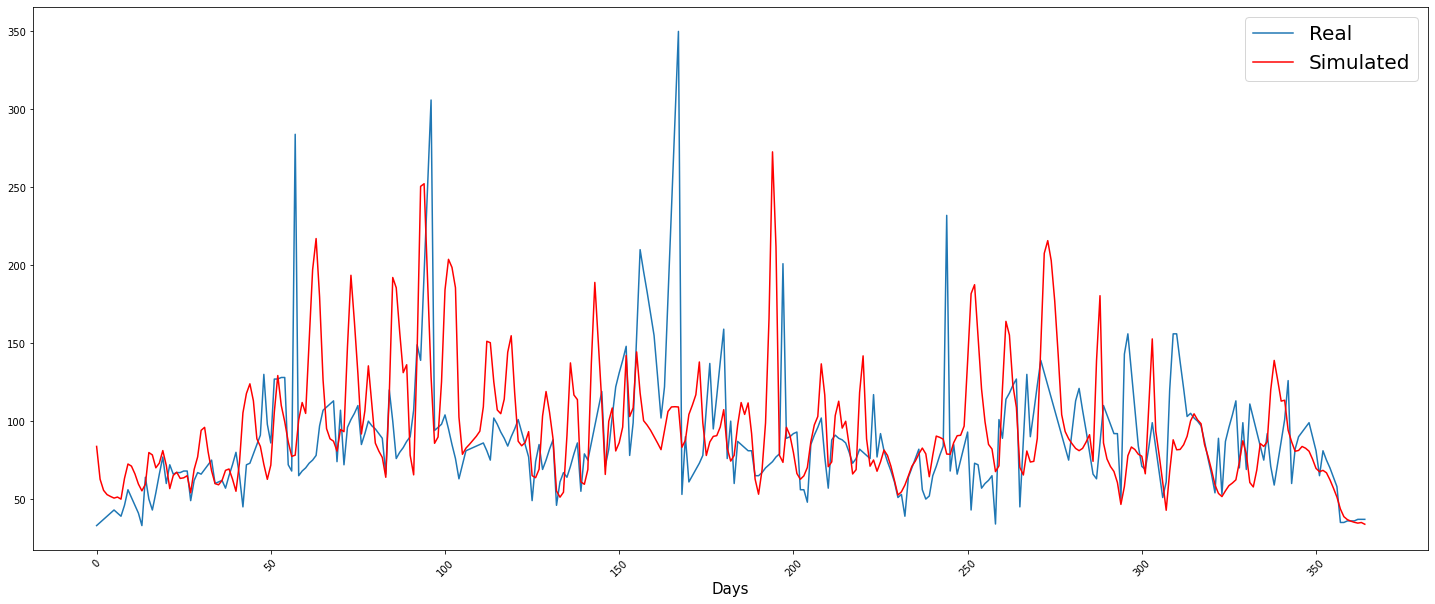

In [10]:
print(df_metricas)
import matplotlib.dates as mdates
# Visualização gráfica das predições comparadas aos valores reais
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(1,1,1) 
# plt.title('', fontsize=25)
plt.plot(df_dqo.index, df_dqo['DQO_real'], label = 'Real')
plt.plot(df_dqo.index, df_dqo['DQO_simulada'], label = 'Simulated', c='r')
plt.legend(fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.xticks(fontsize=10, rotation=45)

# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%d'))

plt.show()